In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [2]:
data=pd.read_csv(r'C:\Users\konto\atommi\selenium\data_all.csv')
data

,Title,Details
0,Bulgari Goes Green For Latest Jewelry Collection,FashionBulgari Goes Green For Latest Jewelry C...
1,Gucci's Grand Tour of New High Jewelry Collection,FashionGucci's Grand Tour of New High Jewelry ...
2,Best Jewelry from the Fall/Winter 2022 Runways,FashionBest Jewelry from the Fall/Winter 2022 ...
3,13 Men's Jewelry Pieces to Shop Now,Men's13 Men's Jewelry Pieces to Shop NowHere's...
4,How Male Celebs Wear Their Jewelry,FashionHow Male Celebs Wear Their JewelryJewel...
...,...,...
1466,Alicia Keys's Met Gala Hair Is Confusing and D...,"Have you ever seen Zendaya miss? Yeah, neither..."
1467,The Best Manicures and Nail Art at the BET Awards,Think of your ear as an empty canvas. With the...
1468,The Most Memorable Oscars Beauty Looks of All ...,"Ah, nipple piercings. So cute, yet so intimida..."
1469,This $135 Serum Is Literally Liquid Gold for Y...,"To me, tragus piercings always stood for colle..."


In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
stop = stopwords.words('english') + ["trends","jewelry","trend","jewellery","design","designer"," features","fashion","vintage","sustainable","materials","style","moment","look","also","next","brand","major","like","taking","another","hitting","collection","show","best","hair","icon","shop","wear","nail","celebity","nail","take","chic","make","piece","peak","york","eight","visit","soure","unforgettable","view","fall","fallfrom","something","heard","made","thing"]
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [6]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [7]:
data['Details'] = data['Details'].apply(remove_encoding_text)

In [8]:
text = ' '.join(words for words in data['Details'])
len(text)


4564633

In [9]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [10]:
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens


In [11]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((1,1)), stop_words = stop, strip_accents = 'unicode')

In [12]:
tdm = vectorizer.fit_transform(data['Details'])


C:\Users\konto\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\konto\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'feature', 'material'] not in stop_words.
  warnings.warn(


In [13]:
vectorizer.vocabulary_.items()

dict_items([('fashionbulgari', 3391), ('go', 3961), ('green', 4058), ('latest', 5156), ('collectionbulgari', 1918), ('approach', 437), ('emerald', 3032), ('showcase', 8346), ('exquisite', 3287), ('newest', 6177), ('high', 4305), ('inspired', 4673), ('natural', 6099), ('world', 10192), ('many', 5571), ('samaa', 7976), ('khullardress', 5013), ('alberta', 190), ('ferretti', 3460), ('necklace', 6119), ('earring', 2825), ('bulgaritagsjewelryjewelrycollectionbulgarirelated', 1312), ('articlesfashionambush', 511), ('yoon', 10258), ('brings', 1251), ('contemporary', 2102), ('edge', 2939), ('serpenti', 8184), ('accessoriesin', 32), ('eye', 3306), ('famed', 3349), ('celebrates', 1541), ('beautiful', 877), ('versatility', 9850), ('lizzie', 5337), ('fifth', 3478), ('avenue', 652), ('flagship', 3531), ('openingall', 6494), ('star', 8751), ('came', 1387), ('play', 7076), ('store', 8833), ('singaporeshoppingthe', 8421), ('ultimate', 9656), ('woman', 10166), ('gift', 3888), ('guide', 4097), ('holiday'

In [15]:
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [16]:
def by_name(ele):
    return ele[0]
def by_marks(ele):
    return ele[1]

In [17]:

print("Sorting with by_marks as key parameter:",sorted(tfidf_weights, key=by_marks))

Sorting with by_marks as key parameter: [('pradas', 0.04125508110780029), ('collectionyou', 0.04125508110780029), ('ofseveral', 0.04125508110780029), ('iscarving', 0.04125508110780029), ('produced', 0.04125508110780029), ('merchandised', 0.04125508110780029), ('fashionmovement', 0.04125508110780029), ('shanghai', 0.04125508110780029), ('duosharona', 0.04125508110780029), ('nave', 0.04125508110780029), ('newness', 0.04125508110780029), ('operation', 0.04125508110780029), ('snapping', 0.04125508110780029), ('canclick', 0.04125508110780029), ('hunger', 0.04125508110780029), ('forperennial', 0.04125508110780029), ('freshness', 0.04125508110780029), ('couplehad', 0.04125508110780029), ('theymoved', 0.04125508110780029), ('china', 0.04125508110780029), ('aviv', 0.04125508110780029), ('wasthe', 0.04125508110780029), ('speed', 0.04125508110780029), ('guess', 0.04125508110780029), ('happeningat', 0.04125508110780029), ('afast', 0.04125508110780029), ('reallywant', 0.04125508110780029), ('produc

In [19]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=100).fit_words(dict(tfidf_weights))

(-0.5, 1499.5, 1199.5, -0.5)

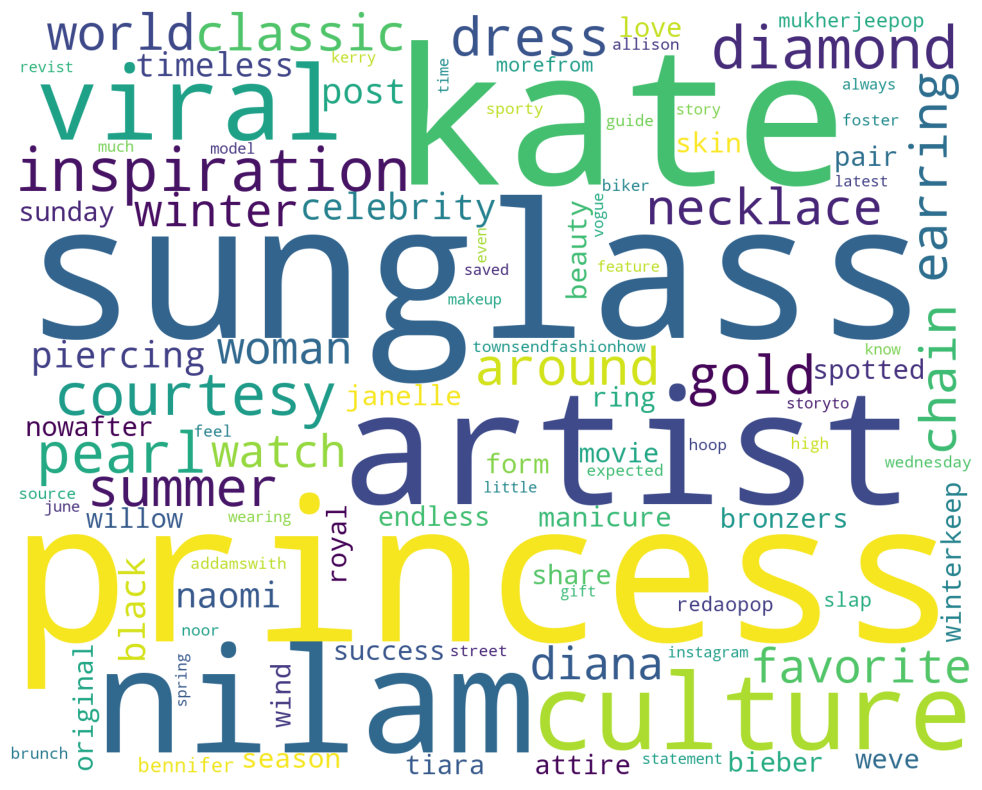

In [23]:
plt.figure(figsize=(15,10))
plt.imshow(w)
plt.axis('off')

In [24]:
from PIL import Image
import numpy as np

In [25]:
mask_img = 'cloud.png'

In [26]:
mask = np.array(Image.open(mask_img).convert('RGBA'))

In [27]:
w = WordCloud(width=1500, mask = mask ,height=1200, mode='RGBA', background_color='white', max_words=100).fit_words(dict(tfidf_weights))


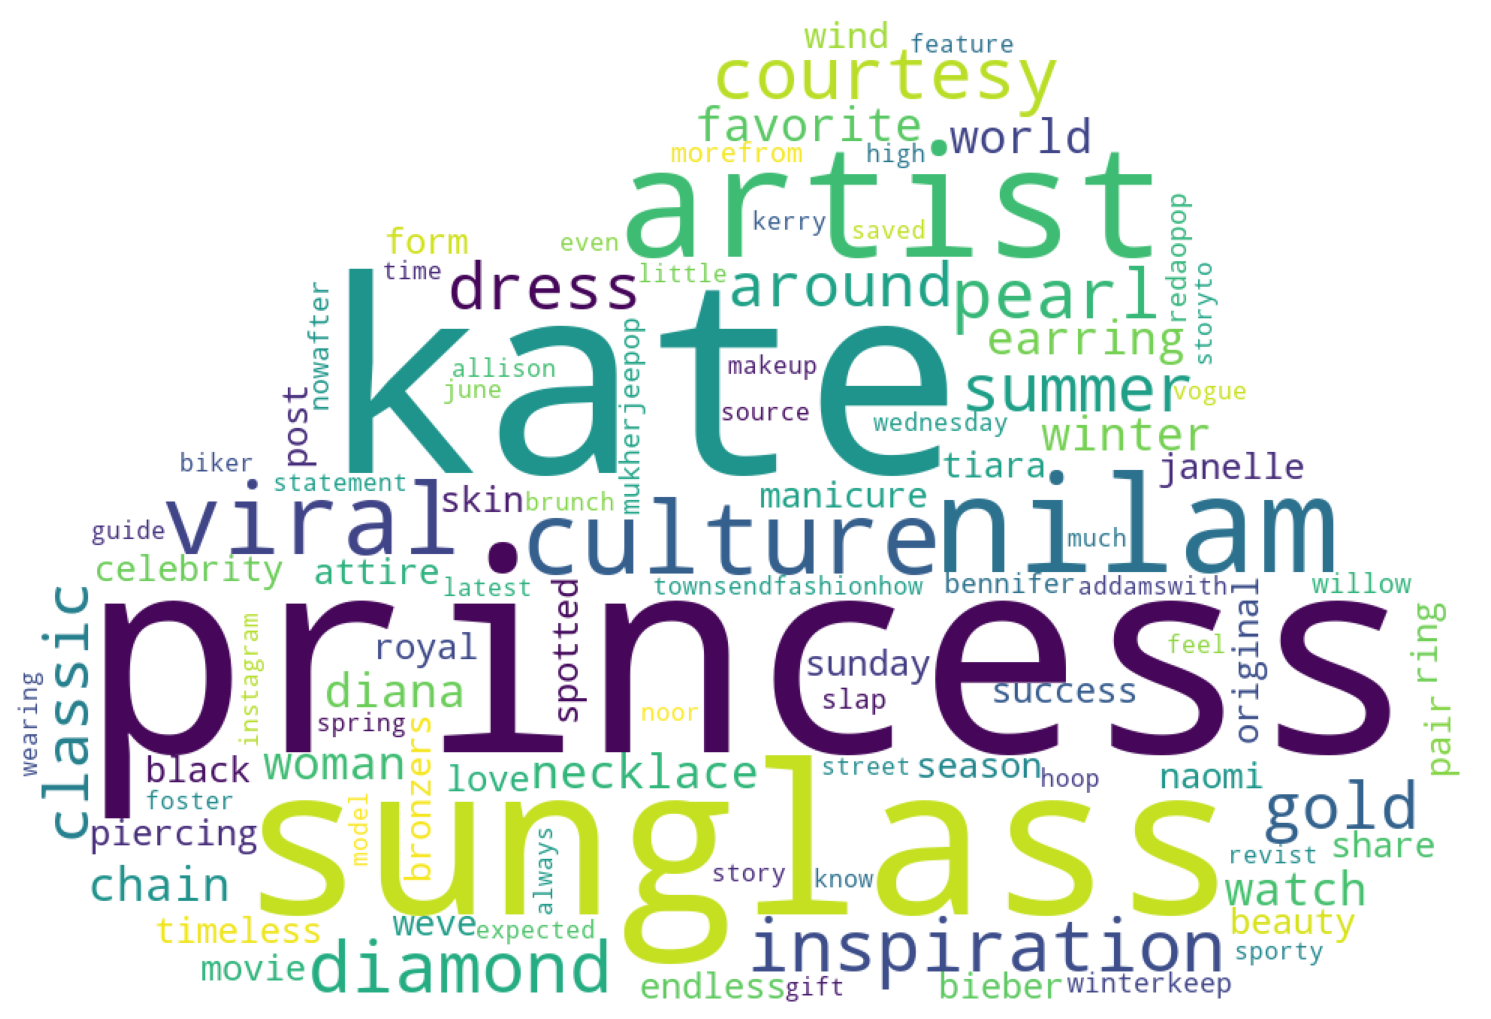

In [28]:
plt.figure(figsize=(15,10))
plt.imshow(w)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
len(tfidf_weights)

10307